In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

%matplotlib inline

## Problem 1

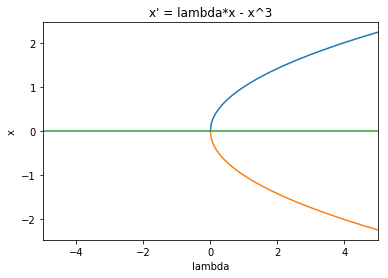

In [2]:
def EmbeddingAlg(param_list, guess, F):
    X = []
    for param in param_list:
        try:
            # Solve for x_value making F(x_value, param) = 0.
            x_value = newton(F, guess, fprime=None, args=(param,), tol=1E-7, maxiter=50)
            # Record the solution and update guess for the next iteration.
            X.append(x_value)
            guess = x_value
        except RuntimeError:
            # If Newton's method fails, return a truncated list of parameters
            # with the corresponding x values.
            return param_list[:len(X)], X
    # Return the list of parameters and the corresponding x values.
    return param_list, np.array(X)

def F(x, lmbda):
    return x*lmbda - x**3

# Top curve shown in the bifurcation diagram
C1, X1 = EmbeddingAlg(np.linspace(0, 5, 200)[::-1], np.sqrt(5), F)
# The bottom curve
C2, X2 = EmbeddingAlg(np.linspace(0, 5, 200)[::-1], -np.sqrt(5), F)
# The middle curve
C3, X3 = EmbeddingAlg(np.linspace(-5, 5, 200), 0, F)

plt.plot(C1, X1)
plt.plot(C2, X2)
plt.plot(C3, X3)
plt.xlabel('lambda')
plt.ylabel('x')
plt.title(r"x' = lambda*x - x^3")
plt.xlim(-5,5)
plt.show()

# Problem 2

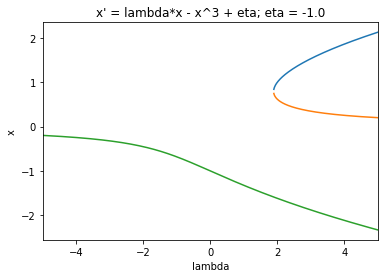

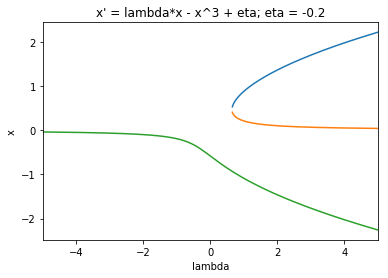

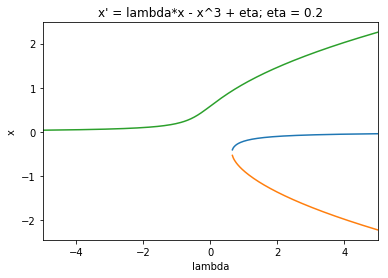

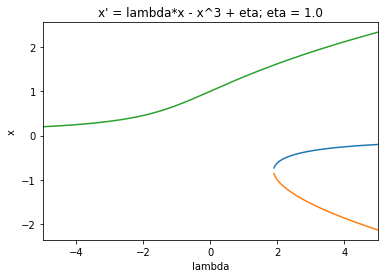

In [3]:
def EmbeddingAlg(param_list, guess, F):
    X = []
    for param in param_list:
        try:
            # Solve for x_value making F(x_value, param) = 0.
            x_value = newton(F, guess, fprime=None, args=(param,), tol=1E-7, maxiter=50)
            # Record the solution and update guess for the next iteration.
            X.append(x_value)
            guess = x_value
        except RuntimeError:
            # If Newton's method fails, return a truncated list of parameters
            # with the corresponding x values.
            return param_list[:len(X)], X
    # Return the list of parameters and the corresponding x values.
    return param_list, np.array(X)

starting_vals = [[np.sqrt(5), 0, 0],[np.sqrt(5), 0, 0],[0,-np.sqrt(5),0],[0, -np.sqrt(5), 0]]
i = 0

for eta in [-1., -.2, .2, 1.]:
    def F(x, lmbda):
        return x*lmbda - x**3 + eta
    if i==0 or i==4:
        a = 1.8
    else:
        a = .5
    # Top curve shown in the bifurcation diagram
    C1, X1 = EmbeddingAlg(np.linspace(a, 5, 200)[::-1], starting_vals[i][0], F)
    # The bottom curve
    C2, X2 = EmbeddingAlg(np.linspace(a, 5, 200)[::-1], starting_vals[i][1], F)
    # The middle curve
    C3, X3 = EmbeddingAlg(np.linspace(-5, 5, 200), starting_vals[i][2], F)
    i += 1
    
    plt.plot(C1, X1)
    plt.plot(C2, X2)
    plt.plot(C3, X3)
    plt.xlabel('lambda')
    plt.ylabel('x')
    plt.title(r"x' = lambda*x - x^3 + eta; eta = {}".format(eta))
    plt.xlim(-5,5)
    plt.show()

# Problem 3

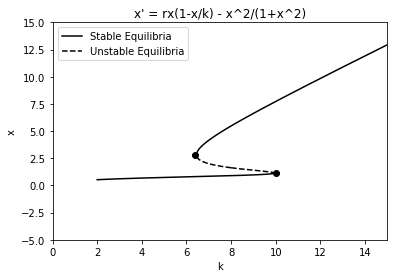

In [17]:
def system(x, k):
    r = .56
    return r*x*(1. - (x/np.float(k))) - (x**2 / (1. + x**2))

def EmbeddingAlg(param_list, guess, F):
    X = []
    for param in param_list:
        try:
            # Solve for x_value making F(x_value, param) = 0.
            x_value = newton(F, guess, fprime=None, args=(param,), tol=1E-7, maxiter=50)
            # Record the solution and update guess for the next iteration.
            X.append(x_value)
            guess = x_value
        except RuntimeError:
            # If Newton's method fails, return a truncated list of parameters
            # with the corresponding x values.
            return param_list[:len(X)], X
    # Return the list of parameters and the corresponding x values.
    return param_list, np.array(X)

starting_vals = [[np.sqrt(5), 0, 0],[np.sqrt(5), 0, 0],[0,-np.sqrt(5),0],[0, -np.sqrt(5), 0]]
i = 0

start = [(2,10.5, .5, 1), (6.2,15,13, -1), (8,10,2,1), (6,8,2,-1)]

# Top curve shown in the bifurcation diagram
C1, X1 = EmbeddingAlg(np.linspace(start[0][0], start[0][1], 200)[::start[0][3]], start[0][2], system)
# The bottom curve
C2, X2 = EmbeddingAlg(np.linspace(start[1][0], start[1][1], 200)[::start[1][3]], start[1][2], system)
# The middle curve (in two parts)
C3, X3 = EmbeddingAlg(np.linspace(start[2][0], start[2][1], 200)[::start[2][3]], start[2][2], system)
C4, X4 = EmbeddingAlg(np.linspace(start[3][0], start[3][1], 200)[::start[3][3]], start[3][2], system)

plt.plot(C1, X1, 'k', label='Stable Equilibria')
plt.plot(C2, X2, 'k')
plt.plot(C3, X3, '--k', label='Unstable Equilibria')
plt.plot(C4, X4, '--k')
a = np.array([6.4,10])
b = np.array([2.8, 1.1])
plt.scatter(a,b,c='k')
plt.xlabel('k')
plt.ylabel('x')
plt.title("x' = rx(1-x/k) - x^2/(1+x^2)")
plt.xlim(0,15)
plt.ylim(-5,15)
plt.legend()
plt.show()